In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use(style="seaborn-v0_8-talk")
sns.set_theme(style="darkgrid")

from battery_predictor_EIS import BatteryPredictor

In [3]:
df = pd.read_csv('./data/Data_Capacity_25C05.txt', sep='\t')
df.describe()

,time/s,cycle number,ox/red,Capacity/mA.h
count,6.276550e+05,627655.000000,627655.000000,627655.000000
mean,2.561565e+06,187.431892,0.456399,9.717276
std,1.334794e+06,104.763140,0.498096,10.277791
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.406867e+06,96.000000,0.000000,0.711182
50%,2.751194e+06,192.000000,0.000000,5.216726
75%,3.847864e+06,289.000000,1.000000,18.345803
max,4.229806e+06,328.000000,1.000000,37.210831


In [4]:
df.head()

,time/s,cycle number,ox/red,Capacity/mA.h
0,0.0000,0.0,1,0.000000
1,0.0002,0.0,1,0.000003
2,0.0004,0.0,1,0.000005
3,0.0008,0.0,1,0.000010
4,0.0012,0.0,1,0.000015


In [5]:
df_groupby_cycle = df.groupby('cycle number')
df_groupby_cycle.describe()

time/s                                                         \
                count          mean          std           min           25%   
cycle number                                                                   
0.0            1626.0  4.397611e+03  2162.428812  0.000000e+00  2.229321e+03   
1.0            1691.0  2.028858e+04  2284.466038  1.580041e+04  1.811453e+04   
2.0            1687.0  3.612559e+04  2254.809151  3.171565e+04  3.396901e+04   
3.0            1674.0  5.179737e+04  2217.683225  4.742442e+04  4.964990e+04   
4.0            1673.0  6.730768e+04  2200.539375  6.298236e+04  6.517053e+04   
...               ...           ...          ...           ...           ...   
324.0          5272.0  4.171569e+06  1132.548080  4.171091e+06  4.171119e+06   
325.0          6008.0  4.180389e+06   997.430517  4.180006e+06  4.180029e+06   
326.0          5712.0  4.189077e+06   931.815561  4.188725e+06  4.188746e+06   
327.0          3182.0  4.197724e+06  1092.184284  4.197199e+06  4.197208e+06   
328.0         48320.0  4.215961e+06  7782.513835  4.205660e+06  4.211876e+06   

                                                         ox/red            \
                       50%           75%           max    count      mean   
cycle number                                                                
0.0           5.261708e+03  6.249812e+03  6.460034e+03   1626.0  0.327183   
1.0           2.127520e+04  2.226737e+04  2.251005e+04   1691.0  0.353637   
2.0           3.710503e+04  3.806561e+04  3.831656e+04   1687.0  0.352104   
3.0           5.275761e+04  5.369220e+04  5.394035e+04   1674.0  0.347670   
4.0           6.826400e+04  6.918336e+04  6.943224e+04   1673.0  0.347280   
...                    ...           ...           ...      ...       ...   
324.0         4.171142e+06  4.171170e+06  4.174741e+06   5272.0  0.891502   
325.0         4.180052e+06  4.180070e+06  4.183474e+06   6008.0  0.908788   
326.0         4.188764e+06  4.188777e+06  4.191960e+06   5712.0  0.908263   
327.0         4.197228e+06  4.197241e+06  4.200234e+06   3182.0  0.844752   
328.0         4.217883e+06  4.223212e+06  4.229806e+06  48320.0  1.000000   

              ...           Capacity/mA.h                             \
              ...  75%  max         count       mean        std  min   
cycle number  ...                                                      
0.0           ...  1.0  1.0        1626.0  19.891869  13.110631  0.0   
1.0           ...  1.0  1.0        1691.0  19.873853  13.208156  0.0   
2.0           ...  1.0  1.0        1687.0  19.252140  12.911586  0.0   
3.0           ...  1.0  1.0        1674.0  18.902200  12.644995  0.0   
4.0           ...  1.0  1.0        1673.0  18.550024  12.470538  0.0   
...           ...  ...  ...           ...        ...        ...  ...   
324.0         ...  1.0  1.0        5272.0   0.655969   0.930019  0.0   
325.0         ...  1.0  1.0        6008.0   0.553288   0.752398  0.0   
326.0         ...  1.0  1.0        5712.0   0.458333   0.618387  0.0   
327.0         ...  1.0  1.0        3182.0   0.359615   0.674527  0.0   
328.0         ...  1.0  1.0       48320.0   1.447408   0.901689  0.0   

                                                         
                   25%        50%        75%        max  
cycle number                                             
0.0           6.974286  21.541775  32.452656  37.210831  
1.0           6.355010  22.164825  33.027510  36.811696  
2.0           5.987817  21.393626  32.091344  35.920055  
3.0           5.925842  20.985902  31.463877  35.179268  
4.0           5.743697  20.534299  30.946885  34.634764  
...                ...        ...        ...        ...  
324.0         0.204907   0.474219   0.835676   6.540474  
325.0         0.167511   0.474853   0.706536   5.845410  
326.0         0.171739   0.403911   0.578414   5.047149  
327.0         0.014977   0.246110   0.419024   4.433410  
328.0         0.766934   1.690889   2.352776   2.721

In [6]:
capacity = []
for cycle, df in df_groupby_cycle:
    capacity.append(df['Capacity/mA.h'].max())
    
len(capacity)

329

In [7]:
def get_80_percent_point(capacity):
    cnt = 0
    target_idx = -1
    target_capacity = 0
    for i, c in enumerate(capacity):
        if c < 0.8 * capacity[0]:
            if cnt == 0:
                target_idx = i
                target_capacity = c
            if cnt == 3:
                return target_idx, target_capacity
            cnt += 1
        else:
            cnt = 0
            
    raise ValueError("No 80% point found")

In [8]:
get_80_percent_point(capacity)

(77, 29.66321805404955)

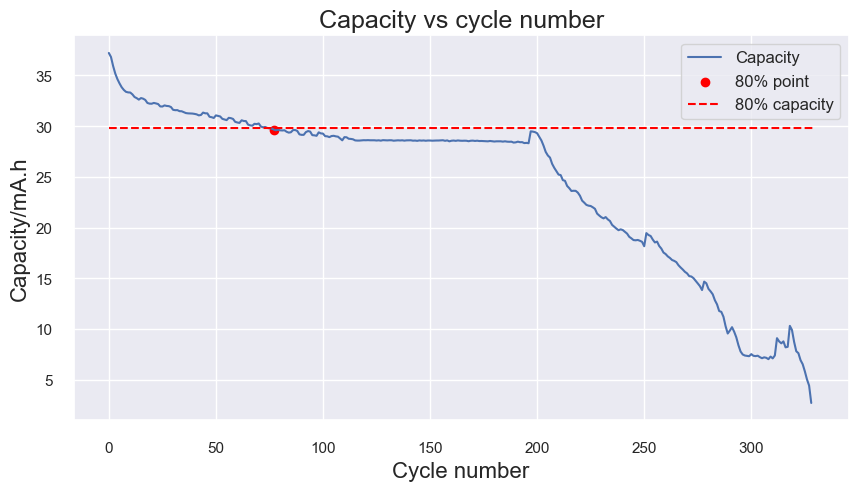

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(capacity)
plt.scatter(*get_80_percent_point(capacity), color='red')
plt.plot([0, len(capacity)], [0.8 * capacity[0], 0.8 * capacity[0]], color='red', linestyle='--')
plt.xlabel('Cycle number', fontsize=16)
plt.ylabel('Capacity/mA.h', fontsize=16)
plt.title('Capacity vs cycle number', fontsize=18)
plt.legend(['Capacity', '80% point', '80% capacity'], fontsize=12)
plt.show()

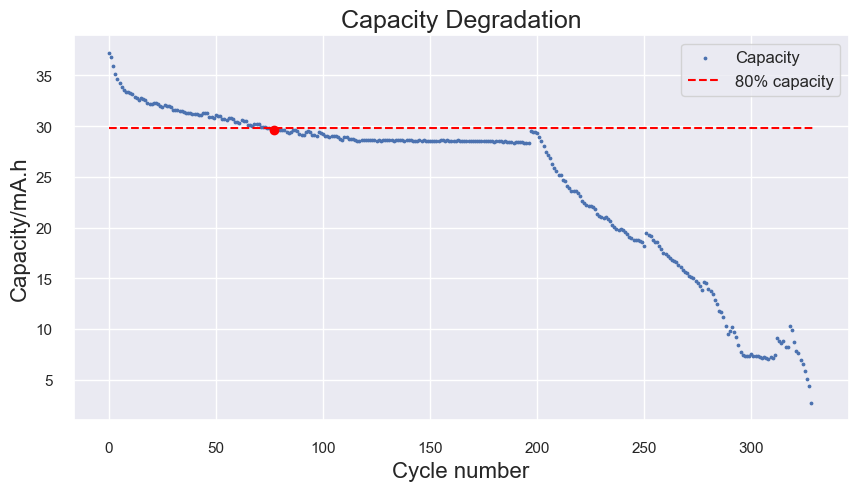

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(capacity)), capacity, s=3, label='Capacity')
plt.scatter(*get_80_percent_point(capacity), color='red')
plt.plot([0, len(capacity)], [0.8 * capacity[0], 0.8 * capacity[0]], color='red', linestyle='--', label='80% capacity')
plt.xlabel('Cycle number', fontsize=16)
plt.ylabel('Capacity/mA.h', fontsize=16)
plt.title('Capacity Degradation', fontsize=18)
plt.legend(fontsize=12)
plt.show()

In [12]:
np.save('data_npy/capacity.npy', capacity)